## Residual Connections (ResNet) Demo with CIFAR-10

In this demo, we will:
1. Load the CIFAR-10 dataset.
2. Define a **simple CNN without residual connections**.
3. Define a **simple ResNet-like model with residual connections**.
4. Train both models for a few epochs.
5. Compare their performance (training speed and accuracy).


In [1]:
# Importing Libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# For reproducibility
tf.random.set_seed(42)


## Load and Preprocess CIFAR-10 Data
CIFAR-10 contains 60,000 images of 10 classes (32x32x3).
We normalize pixel values to [0, 1].


In [2]:
# Load CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to 1D
y_train, y_test = y_train.flatten(), y_test.flatten()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


## Define a Simple CNN (No Residual Connections)
This baseline CNN uses standard convolution, pooling, and dense layers.


In [3]:
def build_simple_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        
        layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2)),
        
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

simple_cnn = build_simple_cnn()
simple_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])
simple_cnn.summary()


D:\Miniconda\envs\eme\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,250 (1.08 MB)

 Trainable params: 282,250 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

## Define a Simple ResNet-like Model
We introduce a **Residual Block** where the input is added back to the output of convolution layers.


In [4]:
# Residual Block
def residual_block(x, filters):
    shortcut = x  # Save input
    
    # Two Conv layers
    x = layers.Conv2D(filters, (3,3), padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, (3,3), padding='same')(x)
    
    # Add shortcut
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# ResNet-like Model
def build_simple_resnet():
    inputs = layers.Input(shape=(32,32,3))
    
    x = layers.Conv2D(32, (3,3), padding='same', activation='relu')(inputs)
    x = residual_block(x, 32)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Conv2D(64, (3,3), padding='same', activation='relu')(x)
    x = residual_block(x, 64)
    x = layers.MaxPooling2D((2,2))(x)
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

resnet_model = build_simple_resnet()
resnet_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
resnet_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 32, 32, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 32, 32, 32)        │             896 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 32, 32, 32)        │           9,248 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 32, 32, 32)        │           9,248 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 32, 32, 32)        │               0 │ conv2d_4[0][0],            │
│                               │                           │                 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 32, 32, 32)        │               0 │ add[0][0]                  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 16, 16, 32)        │               0 │ activation[0][0]           │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 16, 16, 64)        │          18,496 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 16, 16, 64)        │          36,928 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 16, 16, 64)        │          36,928 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_1 (Add)                   │ (None, 16, 16, 64)        │               0 │ conv2d_7[0][0],            │
│                               │                           │                 │ conv2d_5[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 16, 16, 64)        │               0 │ add_1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_3               │ (None, 8, 8, 64)          │               0 │ activation_1[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 4096)              │               0 │ max_pooling2d_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 64)                │         262,208 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 374,602 (1.43 MB)

 Trainable params: 374,602 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

## Train Both Models
We will train each model for 5 epochs to compare training speed and accuracy.


In [5]:
from livelossplot import PlotLossesKerasTF

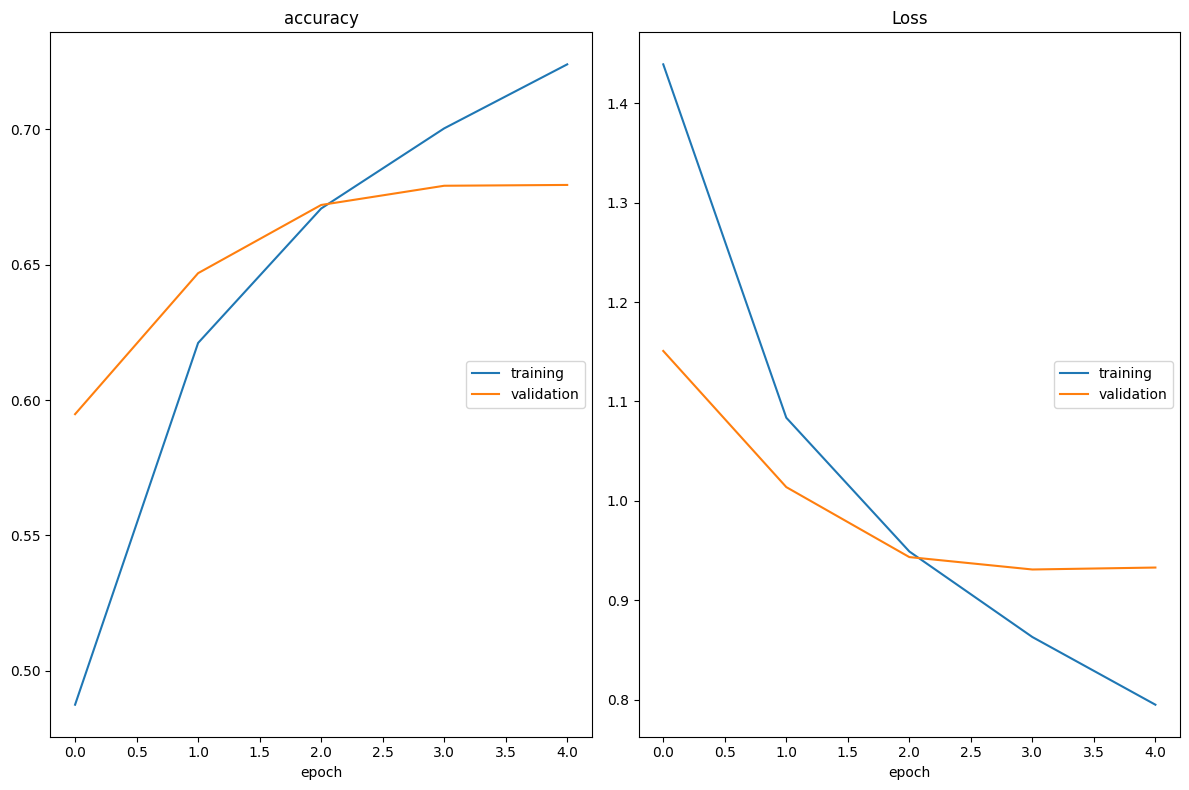

accuracy
	training         	 (min:    0.487, max:    0.724, cur:    0.724)
	validation       	 (min:    0.595, max:    0.679, cur:    0.679)
Loss
	training         	 (min:    0.795, max:    1.439, cur:    0.795)
	validation       	 (min:    0.931, max:    1.151, cur:    0.933)
782/782 - 33s - 42ms/step - accuracy: 0.7241 - loss: 0.7949 - val_accuracy: 0.6795 - val_loss: 0.9329


In [6]:
# Train Simple CNN
history_cnn = simple_cnn.fit(x_train, y_train, epochs=5,
                             validation_data=(x_test, y_test), batch_size=64, verbose=2,
                             callbacks=[PlotLossesKerasTF()])

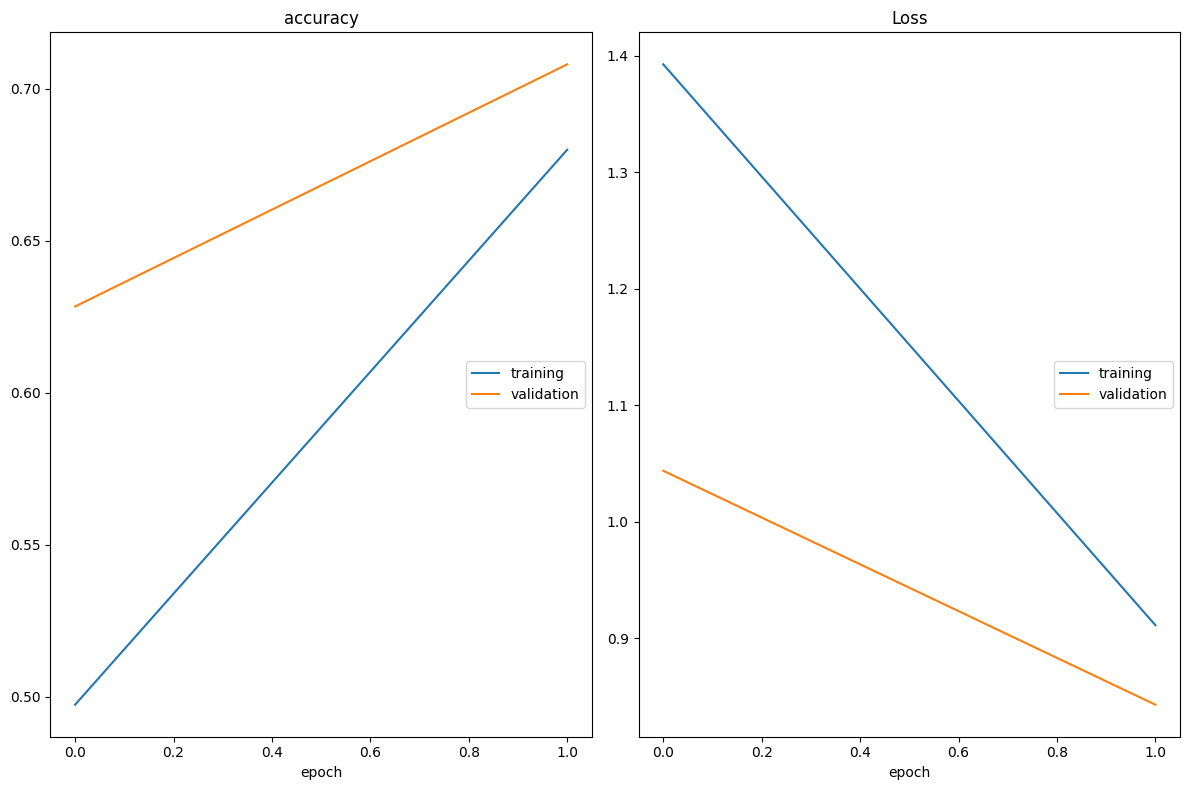

accuracy
	training         	 (min:    0.497, max:    0.680, cur:    0.680)
	validation       	 (min:    0.628, max:    0.708, cur:    0.708)
Loss
	training         	 (min:    0.911, max:    1.392, cur:    0.911)
	validation       	 (min:    0.843, max:    1.044, cur:    0.843)
782/782 - 163s - 208ms/step - accuracy: 0.6800 - loss: 0.9110 - val_accuracy: 0.7081 - val_loss: 0.8428


In [6]:
# Train Simple ResNet
history_resnet = resnet_model.fit(x_train, y_train, epochs=2,
                                  validation_data=(x_test, y_test), batch_size=64, verbose=2,
                             callbacks=[PlotLossesKerasTF()])

# Key Takeaways
- The **Simple CNN** may struggle with deeper layers due to vanishing gradients.
- The **ResNet-like model** uses skip connections, allowing better gradient flow and faster convergence.
- Even with a simple architecture and few epochs, ResNet often achieves **higher validation accuracy**.
